# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **<br>
This is a classification problem because this problem is finding a decision boundaray to separate every student who needs early intervention. Individual student will get a prediction that is either **YES** or **No**. Obviously the output is discrete.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!



### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
#print student_data.columns.values.tolist()

# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = student_data[student_data['passed']=='yes'].shape[0]

# TODO: Calculate failing students
n_failed = n_students - n_passed

# TODO: Calculate graduation rate
assert n_students != 0, "[ASSET] number of student equivalent to zero."
grad_rate = (float(n_passed)/n_students)*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            # If data type is non-numeric, replace all yes/no values with 1/0
            col_data = col_data.replace(['yes', 'no'], [1, 0])
            # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)
            # Collect the revised columns
        output = output.join(col_data)
    return output

X_all = preprocess_features(X_all)
#Standardization of a dataset is a common requirement for many machine learning estimators
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_all_scaled = pd.DataFrame( scaler.fit_transform(X_all), index=X_all.index, columns=X_all.columns)
from IPython.display import display,HTML
#display(X_all_scaled.head())
print "Processed feature columns ({} total features):\n{}".format(len(X_all_scaled.columns), list(X_all_scaled.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all_scaled.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
random_state_constant = 65535
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all,
                                                    test_size=float(num_test)/n_students,
                                                    random_state= random_state_constant)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **<br> My first impression of this data was that there are so many feature of the data, therefore I tried to analysis  the data simply. The visualization of the data describes random error or noise instead of the underlying relationship. Thus avoiding the **curse of dimensionality** and the **over-fitting** of the data of the model is the most important under these circumstances. Furthermore, some algorithms are not be expected because they can't handle categorical features well.<br> In conclusion, I prefer models that are appropriate for high-dimensional features and over-fitting.

* Support Vector Machines (SVMs)
    * SVMs are a popular algorithm to solve real-world problem. For example, Face detection is a common application with SVMs. Although face detection using SVMs published almost 20 years ago, it's working well now. (e.g. [E. Osuna(1997)][1])
    * The strengths of the model are summarized below.
        * No local optimal. SVMs perform well when user want more efficient methods to train model.
        * SVMs have a regularization term. SVMs perform well when there is a tradeoff between a model's ability to minimize bias and variance.
        * The complexity of trained classifier is characterized by the number of support vectors rather than the dimensionality of the data. SVMs perform well when the feature space is high-dimensional.
        * We can use SVMs with any different kernel. SVMs perform well when the domain-knowledges will be applied to improve model.
    * The weaknesses of the model are summarized below.
        * Choice of the kernal. SVMs perform poorly when the kernel fucntion is not suitble for problem.
        * High time-complexity and extensive memory requirements. SVMs perform poorly when solving large-scale task.
    * Basically, as mentioned above SVMs perform well in high-dimensional features and it could tune the Bias–variance tradeoff directly that make this model a good candidate for the problem. Futhermore,The size of this task is acceptable to SVM, and as such the one of weakness will not affect performance.
* AdaBoost
    * AdaBoost has been a popular learning model in computer vision. AdaBoost can be applied to a practical problem what is Multi-view face detection (MVFD) that used to detect upright faces in images that with ±90-degree rotation-out-of-plane (ROP) pose changes. (e.g. [Bo Wu(2004)][2])
    * The strengths of the model are summarized below.
        * Boosting are known as useful learning algorithms for high-dimensional data empirically.(e.g. [B¨uhlmann and Yu (2003)][3]) Ensemble methods perform well when the feature space is high-dimensional.
        * AdaBoost utilize the strengths of one method to complement the weaknesses of another. AdaBoost perform well when user is interested in the best posiible classification accuracy.
    * The weaknesses of the model are summarized below.
        * The total storage depends on the size of each component classifier itself and the size of the ensemble. AdaBoost performs poorly when the meory is limited.
        * In order to classify an input query, all component classifiers must be proessed. AdaBoost performs poorly when the run-time system is not parallelized or component classifiers are not all "weak".
        * AdaBoost are more difficult for non-expert users to perceive the underlying reasoning process leading to a decision. AdaBoost performs poorly when unterstanding data.
    * Basically, AdaBoost are useful models for high-dimensional data that makes this model be a good candidate for the problem. Although AdaBoost are sensitive to noisy data, I believe that the number of noises is not influential after tuning.
* Gaussian Naive Bayes (GaussianNB)
    * Although the most famous application of GaussianNB is spam filter, GaussianNB is still a good algorithm in other domain. For example, GaussianNB classifier is utilized for recognizing emotions of human from continous video.(e.g. [Ira Cohen(2003)][4])
    * The strengths of the model are summarized below.
        * GaussianNB is great for very high-dimensional problems because it makes a very
strong assumption that it threat all of the input dimensions as independent from each other. GaussianNB performs well when this problem is high-dimensional.
        * An additional advantage of GaussianNB is that performing a searchlight analysis using a GaussianNB is orders of magnitude faster than using other algorithmm. GaussianNB performs well when the task is large.
    * The weaknesses of the model are summarized below.
        * GaussianNB may underfit or overfit because the size of hypothesis space is fixed. GaussianNB performs poorly when the prior probability is wrong or data is scarce.
    * Basically, as mentioned above GaussianNB is great for very high-dimensional that makes be a good candidate for the problem. Futhermore, observing and turning the model with GaussianNB is easier than other algorithms because resulting probabilities are easy to interpret. 
[1]:http://ieeexplore.ieee.org/document/609310/ "Training support vector machines: an application to face detection"
[2]:http://ieeexplore.ieee.org/document/1301512/ "Fast rotation invariant multi-view face detection based on real Adaboost"
[3]:http://zmjones.com/static/statistical-learning/buhlmann-jasa-2003.pdf "P. B¨uhlmann and B. Yu. Boosting with the l2 loss: regression and classification.Journal of the American Statistical Association, 98:324–339, 2003."
[4]:http://www.sciencedirect.com/science/article/pii/S107731420300081X "Facial expression recognition from video sequences: temporal and static modeling"

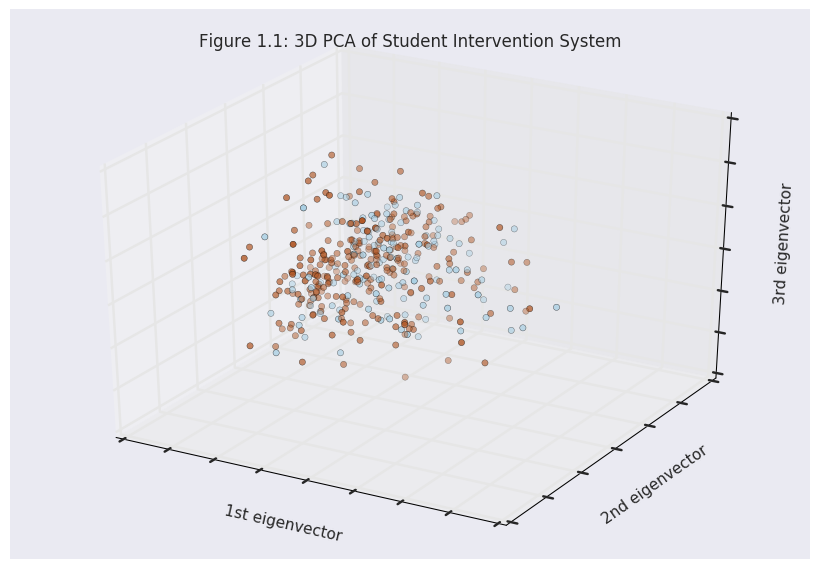

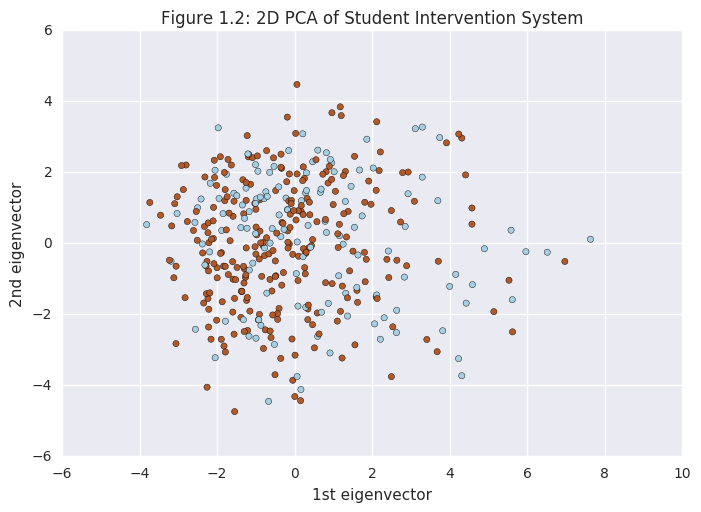

In [6]:
#Note: Visualization of Data with dimensionality reduction(PCA)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
def VisualizationPCA():
    
    from sklearn import datasets

    # 3D PCA
    y_num_all = y_all.replace(['yes','no'],[1,0])
    fig = plt.figure(1)
    ax = Axes3D(fig)
    X_reduced_3D = PCA(n_components=3).fit_transform(X_all_scaled)
    ax.scatter(X_reduced_3D[:, 0], X_reduced_3D[:, 1], X_reduced_3D[:, 2], c=y_num_all, cmap=plt.cm.Paired)
    ax.set_title("Figure 1.1: 3D PCA of Student Intervention System")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])
    plt.figure(2)
    plt.clf()
    X_reduced_2D = PCA(n_components=2).fit_transform(X_all_scaled)
    # 2D PCA
    plt.scatter(X_reduced_2D[:, 0], X_reduced_2D[:, 1], c=y_num_all, cmap=plt.cm.Paired)
    plt.title("Figure 1.2: 2D PCA of Student Intervention System")
    plt.xlabel('1st eigenvector')
    plt.ylabel('2nd eigenvector')
    plt.show()
VisualizationPCA()

Feature ranking:
1. feature school_GP (0.072289)
2. feature school_MS (0.043843)
3. feature sex_F (0.042963)
4. feature sex_M (0.037834)
5. feature age (0.035525)


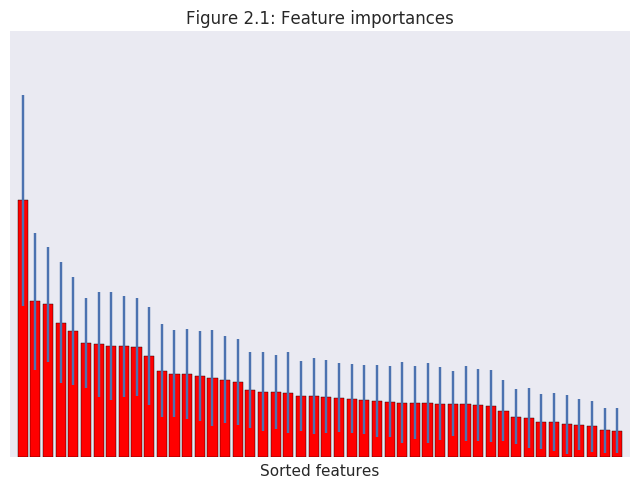

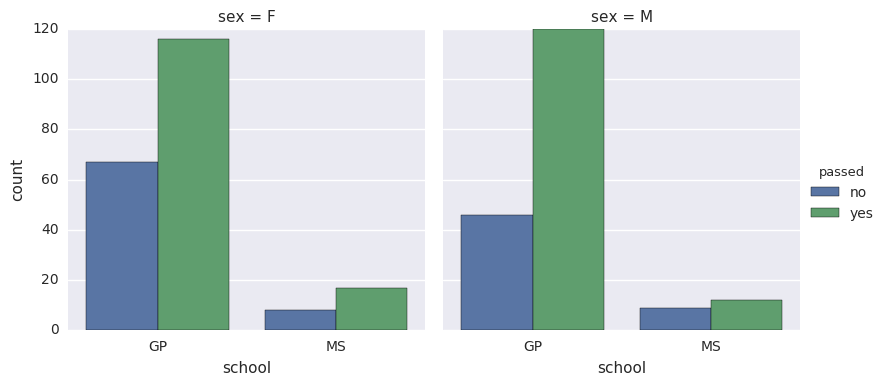

In [7]:
def VisualizationFeatureImportances():
    from sklearn.ensemble import ExtraTreesClassifier
    forest = ExtraTreesClassifier(n_estimators=250)

    forest.fit(X_all_scaled,y_all)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(5):
        print("%d. feature %s (%f)" % (f + 1, X_all_scaled.columns.values[f] , importances[indices[f]]))
    # Plot the feature importances of the forest
    plt.figure(1)
    plt.title("Figure 2.1: Feature importances")
    plt.bar(range(X_all_scaled.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xlabel("Sorted features")
    plt.xticks(())
    plt.yticks(())
    plt.xlim([-1, X_all_scaled.shape[1]])
    plt.show()
    
    sns.factorplot("school", col="sex", data=student_data, hue='passed', kind='count');
VisualizationFeatureImportances()

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [8]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    return end-start

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes'),end-start


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_time = train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    train_score,pred_train_time = predict_labels(clf, X_train, y_train)
    print "F1 score for training set: {:.4f}.".format(train_score)
    test_score,pred_test_time = predict_labels(clf, X_test, y_test)
    print "F1 score for test set: {:.4f}.".format(test_score)
#    print "| {}               |"\
#    " {:.4f}                  |"\
#    " {:.4f}                 |"\
#    " {:.4f}           |"\
#    " {:.4f}          |".format(len(X_train),train_time,pred_test_time,train_score,test_score)

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [9]:
# Import the three supervised learning models from sklearn
from sklearn import svm
from sklearn import ensemble
from sklearn import naive_bayes


# TODO: Initialize the three models
clf_SVC = svm.SVC(random_state = random_state_constant)
clf_Ensemble = ensemble.AdaBoostClassifier(random_state = random_state_constant)
clf_NB = naive_bayes.GaussianNB()

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

clf_list = [clf_SVC, clf_Ensemble, clf_NB]
X_train_list = [X_train_100, X_train_200, X_train_300]
y_train_list = [y_train_100, y_train_200, y_train_300]
# TODO: Execute the 'train_predict' function for each classifier and each training set size
#train_predict(clf, X_train, y_train, X_test, y_test)
gaussian_prior = dict()
for cur_clf in clf_list:
    for cur_X_train, cur_y_train in zip(X_train_list,y_train_list):
        train_predict(cur_clf,cur_X_train,cur_y_train,X_test,y_test)
        #if cur_clf.__class__ == naive_bayes.GaussianNB:
            #gaussian_prior["Size of training set:{}".format(len(cur_X_train))] = cur_clf.class_prior_
#display(gaussian_prior)

Training a SVC using a training set size of 100. . .
Trained model in 0.0019 seconds
Made predictions in 0.0009 seconds.
F1 score for training set: 0.9028.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.8375.
Training a SVC using a training set size of 200. . .
Trained model in 0.0044 seconds
Made predictions in 0.0031 seconds.
F1 score for training set: 0.9116.
Made predictions in 0.0016 seconds.
F1 score for test set: 0.8535.
Training a SVC using a training set size of 300. . .
Trained model in 0.0088 seconds
Made predictions in 0.0066 seconds.
F1 score for training set: 0.9159.
Made predictions in 0.0022 seconds.
F1 score for test set: 0.8421.
Training a AdaBoostClassifier using a training set size of 100. . .
Trained model in 0.0832 seconds
Made predictions in 0.0046 seconds.
F1 score for training set: 0.9771.
Made predictions in 0.0045 seconds.
F1 score for test set: 0.7132.
Training a AdaBoostClassifier using a training set size of 200. . .
Trained model in 0.0920 s

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0019                  | 0.0009                 | 0.9028           | 0.8375          |
| 200               | 0.0042                  | 0.0015                 | 0.9116           | 0.8535          |
| 300               | 0.0086                  | 0.0022                 | 0.9159           | 0.8421          |

** Classifer 2 - AdaBoostClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0831                  | 0.0045                 | 0.9771           | 0.7132          |
| 200               | 0.0913                  | 0.0045                 | 0.9046           | 0.7218          |
| 300               | 0.0966                  | 0.0046                 | 0.8613           | 0.7612          |

** Classifer 3 - GaussianNB**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0007                  | 0.0003                 | 0.2895           | 0.1282          |
| 200               | 0.0008                  | 0.0002                 | 0.8118           | 0.7231          |
| 300               | 0.0009                  | 0.0002                 | 0.7920           | 0.7402          |

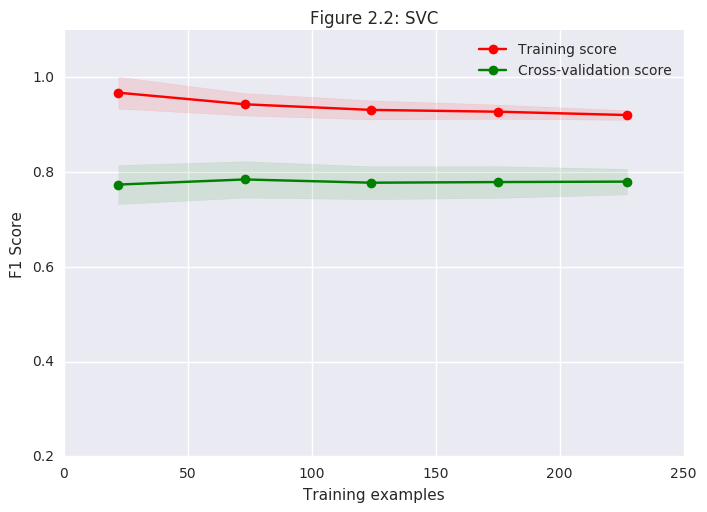

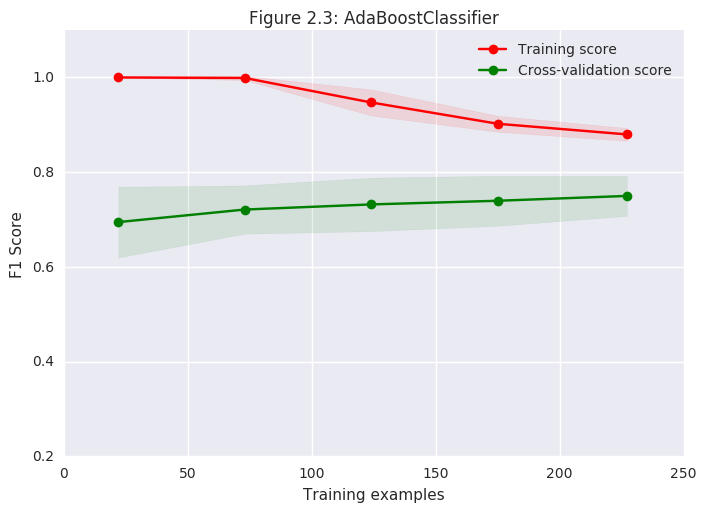

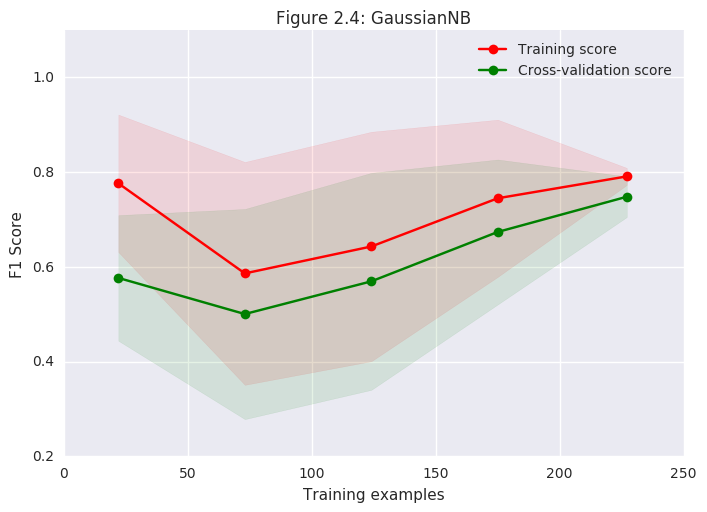

In [10]:
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
from sklearn.metrics import make_scorer
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    f1_score_label = make_scorer(f1_score, pos_label='yes')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=f1_score_label)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
cv = cross_validation.ShuffleSplit(X_train.shape[0], n_iter=30,
                                   test_size=float(num_test)/n_students, random_state=random_state_constant)
plot_learning_curve(clf_SVC,
                    "Figure 2.2: "+clf_SVC.__class__.__name__,
                    X_train, y_train, cv=cv, n_jobs=1, ylim = (0.2,1.1))
plot_learning_curve(clf_Ensemble,
                    "Figure 2.3: "+clf_Ensemble.__class__.__name__,
                    X_train, y_train, cv=cv, n_jobs=1, ylim = (0.2,1.1))
plot_learning_curve(clf_NB,
                    "Figure 2.4: "+clf_NB.__class__.__name__ ,
                    X_train, y_train, cv=cv, n_jobs=1, ylim = (0.2,1.1))
plt.show()

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **<br>
The SVC of SVMs is genereally the most appropriate. I chose SVC as the best model because it's impeccable in competition among these models. I'll discuss availability first. SVC has not only the best score but also the best stability. According to Occam's Razor, The simplest anwser is usually correct. SVC has the outstanding score for smallest training set. It approximates the socre for largest training set. The discussion above shows that SVC is the the *most robust* model for availability of this task. Second, although the time complexity of SVC is quadratic, it's passable in practical experiments because the size of this problem is not so large, such more splitted(smaller) traning set.<br>
The trend of learning curve shows that AdaBoost will perform better, if the size of data is more than now. But,  considering limited resource and over-fitting, it still doesn't matter. Also, the time complexity of GausssinNB approximates constant in pracical experiments. I'll choose it, if the size of prolbem is several order of magnitude bigger than now.

In [11]:
# This cell isn't related to the cell above.
# To improve reading fluency, this cell move up.
def VisualzationComponetOfSVM():
    from sklearn.linear_model import LogisticRegression
    from sklearn.datasets import make_circles
    from sklearn.metrics.pairwise import polynomial_kernel
    # we create 40 separable points
    np.random.seed(0)
    X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
    Y = [0] * 20 + [1] * 20
    #Logistic Regression
    clfLogreg1 = LogisticRegression(C=1e-16)
    clfLogreg1.fit(X,Y)
    clfLogreg2 = LogisticRegression(C=1)
    clfLogreg2.fit(X,Y)
    clfLogreg3 = LogisticRegression(C=1e9)
    clfLogreg3.fit(X,Y)
    xx,yy = np.xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs1 = clfLogreg1.predict_proba(grid)[:, 1].reshape(xx.shape)
    probs2 = clfLogreg2.predict_proba(grid)[:, 1].reshape(xx.shape)
    probs3 = clfLogreg3.predict_proba(grid)[:, 1].reshape(xx.shape)
    plt.figure(1)
    fig, ax = plt.subplots()
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    ax.contour(xx, yy, probs1, levels=[.5], colors ='r', vmin=0, vmax=.6)
    ax.contour(xx, yy, probs2, levels=[.5], colors ='g', vmin=0, vmax=.6)
    ax.contour(xx, yy, probs3, levels=[.5], colors ='b', vmin=0, vmax=.6)
    plt.ylim(-5,5)
    plt.title("Figure 4.1: The boundary")
    ax.annotate('Which is the best boundary?',
                 xy=(-2, 4), xytext=(-1, 4.5),
                 arrowprops={'arrowstyle': '->','color':'red'})
    ax.annotate('Which is the best boundary?',
                 xy=(-2.4, 2.4), xytext=(-1, 4.5),
                 arrowprops={'arrowstyle': '->','color':'red'})
    ax.annotate('Which is the best boundary?',
                 xy=(-3.9, 2.9), xytext=(-1, 4.5),
                 arrowprops={'arrowstyle': '->','color':'red'})
    #SVM
    # fit the model
    clfSVM = svm.SVC(kernel='linear')
    clfSVM.fit(X, Y)
    # get the separating hyperplane
    w = clfSVM.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clfSVM.intercept_[0]) / w[1]
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clfSVM.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clfSVM.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])
    plt.show()
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(2)
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clfSVM.support_vectors_[:, 0], clfSVM.support_vectors_[:, 1],
                s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.axis('tight')
    plt.ylim(-5,5)
    plt.title("Figure 4.2: The boundary with the maximum margin")
    v = np.array([xx[0],yy[0]])
    w = np.array([xx[len(xx)-1],yy[len(yy)-1]])
    for i in range(len(clfSVM.support_vectors_)):
        p = np.array([clfSVM.support_vectors_[i, 0],clfSVM.support_vectors_[i, 1]])
        ray = np.subtract(w,v)
        t = np.dot(  np.subtract(p,v), ray ) / np.dot(ray,ray)
    
        proj = np.add(v,np.multiply(t,ray))
        plt.annotate('',
                     xy=([p[0],p[1]]), xytext=[proj[0],proj[1]],
                     arrowprops={'arrowstyle': '<->','color':'black'})
    plt.annotate("Maximum margin",[clfSVM.support_vectors_[i, 0]+0.5,clfSVM.support_vectors_[i, 1]-0.5])
    
    plt.show()
    #
    X,y = make_circles(noise=0.2, factor=0.01, random_state=random_state_constant)
    plt.figure(3)

    clfSVM.fit(X,y)
    # get the separating hyperplane
    w = clfSVM.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[:,0]), max(X[:,0]))
    yy = a * xx - (clfSVM.intercept_[0]) / w[1]
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clfSVM.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clfSVM.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])
    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
    plt.ylim(min(X[:,1]),max(X[:,1]))
    plt.title("Figure 4.3: Hard to separate passing or not ")
    
    plt.show()
    fig = plt.figure(4)
    ax = Axes3D(fig)
    Z = X[:,0]**2+X[:,1]**2-2.0
    X_combind = np.c_[ X, Z ] 
    clfSVM.fit(X_combind,y)
    z_lambda = lambda x,y: (-clfSVM.intercept_[0]-clfSVM.coef_[0][0]*x-clfSVM.coef_[0][1]) / clfSVM.coef_[0][2]
    tmp = np.linspace(-2,2,51)
    xx,yy = np.meshgrid(tmp,tmp)
    ax.plot_surface(xx,yy, z_lambda(xx,yy),linewidth=0, color = 'k' ,alpha = 0.3)
    ax.scatter(X[:, 0], X[:, 1], Z, c=y, cmap=plt.cm.Paired)
    ax.view_init(5,30 )
    plt.title("Figure 4.4: Separate passing or not in high dimensions easily")

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **<br>
1. The classifiers takes data about previous students (age, gender, family, etc), and uses them to create a function that draws a boundary between the students who passed and those who didn't. But, as Figure 4.1 shows, classifiers may draw different boundary between the students. As Figure 4.2 shows, SVM draws the boundary that keeps maximize the distance from every nearest students. The space between boundary and students can contain more students who didn't appear yet to avoid they are picked into wrong side.
2. Often, though, it's not easy to draw a decision boundary in low dimensions (e.g. Figure 4.3), so the SVM separates the passing and failing students by "kernel trick". Through "kernel trick", students will live in 3D space instead of 2D space.(e.g. Figure 4.4). Thus, SVM draws a 3D plane boundary easiliy between the students who passed and those who didn't.
3. Using this function created with students we already know passed or not, the SVM can look at new students' data and predict the students as the same class as other point in that side when we're locating new students as a point in the plane.

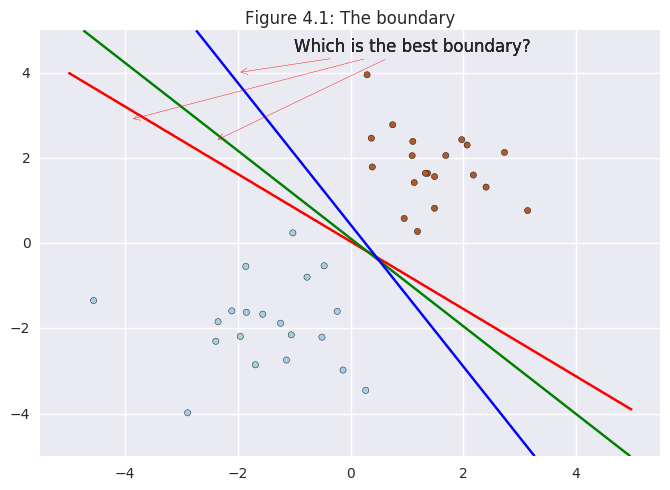

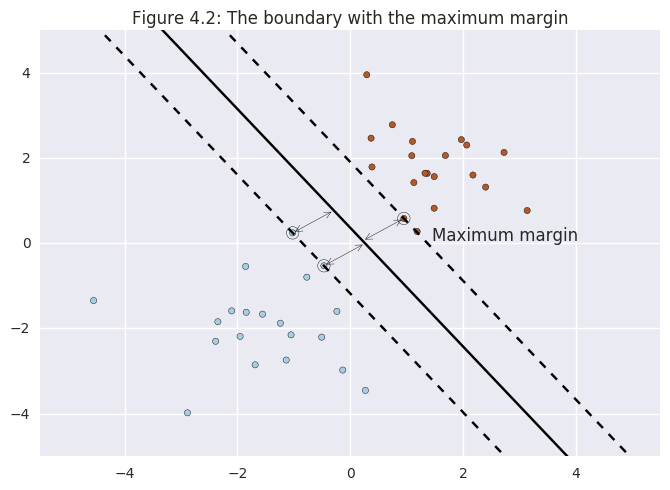

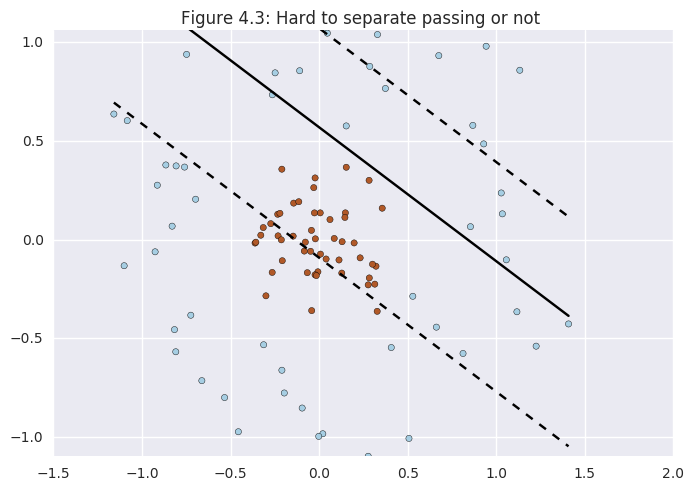

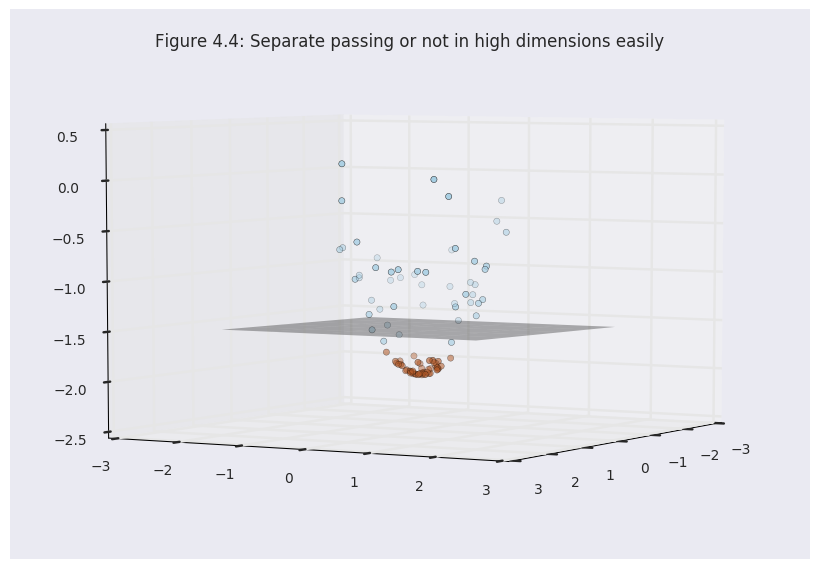

In [12]:
VisualzationComponetOfSVM()

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [13]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
# TODO: Create the parameters list you wish to tune
#display(clf_SVC.get_params())
default_gamma = 1.0/len(X_train.columns.values);
#display(default_gamma)
parameters = [{
        'C': [0.1,0.3, 1, 3, 10, 30, 100, 300, 1000],
        'gamma': [0.0001,0.0003, 0.001, 0.003, 0.01, 0.03, default_gamma ],
        'kernel':['rbf']},{
        'C': [0.1,0.3, 1, 3, 10, 30, 100, 300, 1000],
        'gamma': [0.0001,0.0003, 0.001, 0.003, 0.01, 0.03, default_gamma ],
        'degree': [3,4],
        'kernel':['poly']}]

# TODO: Initialize the classifier
clf = svm.SVC(random_state=random_state_constant,decision_function_shape='ovr')

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
cv = cross_validation.ShuffleSplit(X_train.shape[0],
                                   n_iter=30,
                                   test_size=float(num_test)/n_students,
                                   random_state=random_state_constant)
grid_obj = GridSearchCV(clf,param_grid=parameters,scoring=f1_scorer,cv=cv )

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print "The best params:"
display(clf.get_params())

# Report the final F1 score for training and testing after parameter tuning
#print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
#print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
train_score,pred_train_time = predict_labels(clf, X_train, y_train)
print "Tuned model has a training F1 score of {:.4f}.".format(train_score)
test_score,pred_test_time = predict_labels(clf, X_test, y_test)
print "Tuned model has a testing F1 score of {:.4f}.".format(test_score)

The best params:


{'C': 3,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 65535,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Made predictions in 0.0050 seconds.
Tuned model has a training F1 score of 0.8253.
Made predictions in 0.0017 seconds.
Tuned model has a testing F1 score of 0.8466.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **<br>
the final model's F<sub>1</sub> score for training is 0.8253.<br>
the final model's F<sub>1</sub> score for testing is 0.8466.<br>
The score for training is decreased and the score of testing is increased. the model is not only to fit training data but also unknown data. Less parameters can be tuned because SVM has always been a good classifier and it has no local optima. Only C and parameters of kernel are tunable. But, from the cross validation, avoiding over-fitting has been improved lightly on basis of tuning.

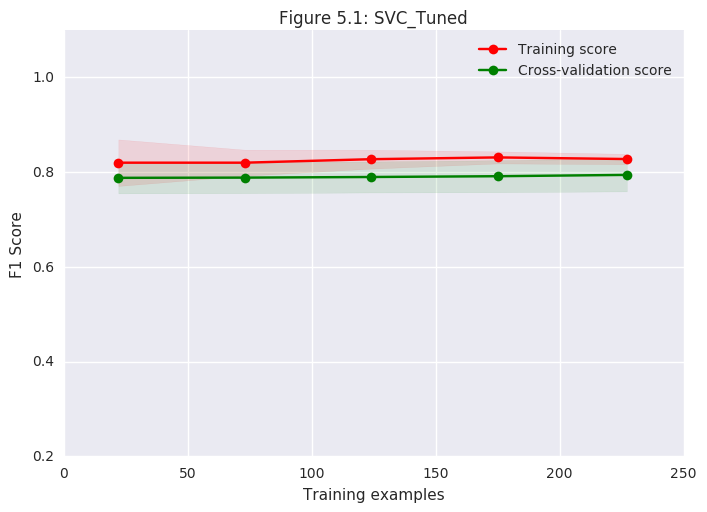

In [14]:
cv = cross_validation.ShuffleSplit(X_train.shape[0],
                                   n_iter=30,
                                   test_size=float(num_test)/n_students,
                                   random_state=random_state_constant)

plot_learning_curve(clf,
                    "Figure 5.1: "+clf.__class__.__name__+"_Tuned",
                    X_train, y_train, cv=cv, n_jobs=1, ylim = (0.2,1.1))
plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.